# Projet : Deep Learning
*Par Arthur Couturier, Enzo Di Maria, José Colin, Rémi Bonrepaux & Yassir El Bista*

<b> Classification d'images de fruits </b> : *apples, bananas, coconuts, grapes, lemons, limes, mangos, oranges, pineapples, tomatoes*.

In [21]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential

<b> Accès à la base de données ainsi qu'aux scripts </b>
1. Vous utilisez Google Colab. Dans ce cas vous devrez cloner le dépôt GitHub en exécutant la portion (1) du code ci-dessous.
2. Vous utilisez Visual Studio Code ou Jupyter Notebook. Dès lors, vous devrez simplement exécuter la portion (2) du code.

In [22]:
# Version distante (1)
# !git clone https://github.com/EnzoN7/Image-classification.git
# path = "./Image-classification/images/"
# sys.path.insert(1, "./Image-classification/scripts/")

# Version locale (2)
path = "./images/"
sys.path.insert(1, "./scripts")

from LoadData import load_data
from PlotTrainingAnalysis import plot_training_analysis

<b> Stockage des fichiers au sein de tenseurs </b>

In [23]:
#labels = ['apples', 'bananas', 'coconuts', 'grapes', 'lemons', 'limes', 'mangos', 'oranges', 'pineapples', 'tomatoes']
labels = ['oranges', 'pineapples', 'tomatoes']

x_train, y_train = load_data(path, labels)
x_val, y_val = load_data(path, labels, _dataset='validation')
x_test, y_test = load_data(path, labels, _dataset='test')

x_train.shape = (1069, 64, 64, 3)
y_train.shape = (1069, 1)


  0% (0 of 10) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
 10% (1 of 10) |##                       | Elapsed Time: 0:00:02 ETA:   0:00:21
 20% (2 of 10) |#####                    | Elapsed Time: 0:00:10 ETA:   0:01:02
100% (10 of 10) |########################| Elapsed Time: 0:00:10 Time:  0:00:10


x_validation.shape = (145, 64, 64, 3)
y_validation.shape = (145, 1)


  0% (0 of 10) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
 10% (1 of 10) |##                       | Elapsed Time: 0:00:00 ETA:   0:00:03
 20% (2 of 10) |#####                    | Elapsed Time: 0:00:00 ETA:   0:00:02
100% (10 of 10) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


x_test.shape = (155, 64, 64, 3)
y_test.shape = (155, 1)


  0% (0 of 10) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
 10% (1 of 10) |##                       | Elapsed Time: 0:00:00 ETA:   0:00:01
 20% (2 of 10) |#####                    | Elapsed Time: 0:00:00 ETA:   0:00:01
100% (10 of 10) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


<b> Affichage d'une sélection d'images aléatoire pour vérifier que l'importation s'est bien déroulée </b>

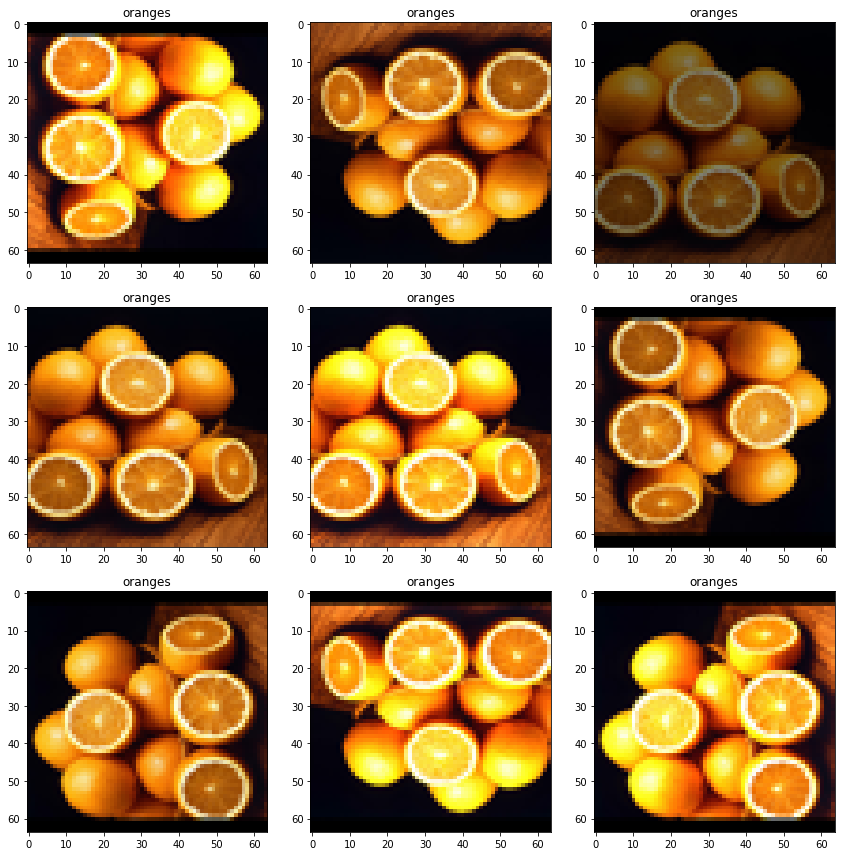

In [24]:
plt.figure(figsize=(12, 12))
shuffle_indices = np.random.permutation(9)
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    image = x_train[shuffle_indices[i]]
    plt.title(labels[int(y_train[shuffle_indices[i]])])
    plt.imshow(image/255)

plt.tight_layout()
plt.show()

<b>Création d'un modèle</b>

In [25]:
x_train = x_train / 255
x_val = x_val / 255
x_test = x_test / 255

IMAGE_SIZE = 64
NB_CLASSES = len(labels)
T_METRICS = 'sparse_categorical_accuracy'

model = Sequential(
  [
    Conv2D(32, 3, input_shape=[IMAGE_SIZE, IMAGE_SIZE, 3], activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, 3, activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(94, 3, activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, 3, activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(NB_CLASSES, activation='softmax')
  ]
)

model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=[T_METRICS])

history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=10)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 94)        54238     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 6, 6, 94)        

<b>Analyse post-entraînement</b>

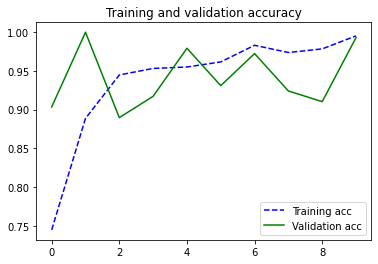

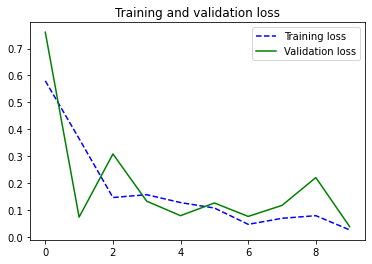

In [26]:
plot_training_analysis(history, T_METRICS)